# 0 - Set up -L

Loading libraries and import necessary codes and files

## Install standard libraries

In [14]:
!pip3 install pyfastx
!pip install scikit-plot
import numpy as np
import pyfastx
import pickle
import torch
import torch.nn as nn
import pandas as pd
import random
from itertools import product
import os 
from tqdm import tqdm # progress bar
import matplotlib.pyplot as plt
import sys
from time import time 


In [0]:
random.seed(42)

In [0]:
dash = '-'*80

## Import custom scripts 

### Load from Google drive:

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!ls "/content/drive/My Drive"

 Booklet.docx	   'Documents (old stuff)'   mock
'Colab Notebooks'   Google		    'Model Outputs'
 Documents	   'intro cbow.pptx'	     Pictures


In [19]:
!ls "/content/drive/My Drive/Model Outputs"  -lt

total 85
drwx------ 2 root root 4096 Jan  3 16:50 20200102
drwx------ 2 root root 4096 Jan  3 08:13 20200103
drwx------ 5 root root 4096 Jan  2 10:10 uploads_new
drwx------ 2 root root 4096 Jan  2 10:10 uploads201911
drwx------ 2 root root 4096 Jan  2 10:10 uploads_201912
drwx------ 2 root root 4096 Dec 29 11:51 dataframes
drwx------ 2 root root 4096 Dec 29 11:23 Fastasplits_train_test
drwx------ 2 root root 4096 Dec 29 10:40 20191204
drwx------ 2 root root 4096 Dec 29 10:40 20191229
drwx------ 2 root root 4096 Dec 29 10:39 20191129
drwx------ 2 root root 4096 Dec 29 10:39 20191122
drwx------ 2 root root 4096 Dec 29 10:39 20191201
drwx------ 2 root root 4096 Dec 29 10:38 20191202
drwx------ 2 root root 4096 Dec 29 10:38 20191203
drwx------ 2 root root 4096 Dec 28 10:57 20191228
drwx------ 2 root root 4096 Dec 27 17:14 20191227
-rw------- 1 root root  151 Dec 27 17:14 00000_create_folders_format_YYYYMMDD.gdoc
drwx------ 2 root root 4096 Nov 29 09:29 old_scripts
drwx------ 2 root root 40

In [20]:
#!ls "/content/drive/My Drive/Model Outputs/uploads_new" -l # details of files
!ls "/content/drive/My Drive/Model Outputs/uploads_new" -lt # sort by time date  (to check if the latest version you uploaded to drive is already seen) 
# more https://www.tecmint.com/sort-ls-output-by-last-modified-date-and-time/ 

total 31939
drwx------ 2 root root    4096 Jan  3 08:11 savepath
drwx------ 2 root root    4096 Jan  3 08:10 %date
-rw------- 1 root root   20480 Jan  2 10:27 GCF_003015225.1_ASM301522v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000091665.1_ASM9166v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000214725.1_ASM21472v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000027345.1_ASM2734v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000027305.1_ASM2730v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000027325.1_ASM2732v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000009045.1_ASM904v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000008865.2_ASM886v2_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000008665.1_ASM866v1_genomic.fna.fxi
-rw------- 1 root root   20480 Jan  2 10:27 GCF_000008525.1_ASM852v1_genomic.fna.fxi
-rw------- 1 root root    

In [21]:
%cd "/content/drive/My Drive/Model Outputs/uploads_new"
#%cd "/content/drive/My Drive/Model Outputs/uploads

/content/drive/My Drive/Model Outputs/uploads_new


In [0]:
#jorge import
from preproc_pipeline import window_pipeline
from warnings import simplefilter
from cbow_model import *
#from cbow_vocabulary import *

In [23]:
"""arita

from preproc_pipeline_NEW import window_pipeline
from preproc_pipeline_NEW import *
from warnings import simplefilter
from cbow_model import *
from cbow_vocabulary import *

"""

'arita\n\nfrom preproc_pipeline_NEW import window_pipeline\nfrom preproc_pipeline_NEW import *\nfrom warnings import simplefilter\nfrom cbow_model import *\nfrom cbow_vocabulary import *\n\n'

In [0]:
from embeddings_LSTM_mod import * 

## **Directories**

### Root- where to load data


In [25]:
!ls "/content/drive/My Drive/Model Outputs"

00000_create_folders_format_YYYYMMDD.gdoc  20200103
20191122				   checkpoints
20191129				   dataframes
20191201				   Fastasplits_train_test
20191202				   genomes
20191203				   old_scripts
20191204				   __pycache__
20191227				   test-savings
20191228				   uploads201911
20191229				   uploads_201912
20200102				   uploads_new


In [26]:
root = "/content/drive/My Drive/Model Outputs/uploads_new"
#root =  "/content/drive/My Drive/Model Outputs/uploads
root

'/content/drive/My Drive/Model Outputs/uploads_new'

### Savepath - where to save daybyday trials

folder with date in format YYYYMMDD

In [27]:
from datetime import datetime

#date = datetime.today().strftime('%Y%m%d') # current date
date = 20200102
#date= 'YYYYMMDD'  #date of choice

savepath = "/content/drive/My Drive/Model Outputs/%s" %(date)
# print (savepath) #show savepath
# os.chdir(savepath) #change directory to (path)

if os.path.exists(savepath) == False:
  print ('YOU SHALL CREATE THE FOLDER IN DRIVE FIRST!')
else: 
  print ('files from today will be saved in:')
  print (savepath)


#!ls "/content/drive/My Drive/Model Outputs/02122019" 
#%cd "/content/drive/My Drive/Model Outputs/02122019" 
#print ("kmers%s" %(date))

files from today will be saved in:
/content/drive/My Drive/Model Outputs/20200102


### other directory check

In [28]:
# directory exists? 
test_directory = "/content/drive/My Drive/Model Outputs/Fastasplits_train_test"
if os.path.exists(test_directory) == False:
  print ('YOU SHALL CREATE THE FOLDER IN DRIVE FIRST!')
else: 
  print ('files from today will be saved in:')
  print (test_directory)
  print ()
  #directory is empty?
  if len(os.listdir(test_directory)) == 0: 
      print("Empty directory") 
  else: 
      print("Not empty directory") 
      !ls test_directory

files from today will be saved in:
/content/drive/My Drive/Model Outputs/Fastasplits_train_test

Not empty directory
ls: cannot access 'test_directory': No such file or directory


In [29]:
len(test_directory)

60

In [30]:
!ls

analysis.py
build_dataset.py
cbow_model.py
cbow_vocabulary.py
conv_LSTM_onehot.py
conv_LSTM.py
%date
embeddings_LSTM_mod.py
embeddings_LSTM.py
eval_dataset.py
filters.py
find_largest_gene.py
GCA_000008525.1_ASM852v1_feature_table.tsv
GCA_000008665.1_ASM866v1_feature_table.tsv
GCA_000008865.2_ASM886v2_feature_table.tsv
GCA_000009045.1_ASM904v1_feature_table.tsv
GCA_000027305.1_ASM2730v1_feature_table.tsv
GCA_000027325.1_ASM2732v1_feature_table.tsv
GCA_000027345.1_ASM2734v1_feature_table.tsv
GCA_000091665.1_ASM9166v1_feature_table.tsv
GCA_000214725.1_ASM21472v1_feature_table.tsv
GCA_003015225.1_ASM301522v1_feature_table.tsv
GCF_000008525.1_ASM852v1_genomic.fna
GCF_000008525.1_ASM852v1_genomic.fna.fxi
GCF_000008665.1_ASM866v1_genomic.fna
GCF_000008665.1_ASM866v1_genomic.fna.fxi
GCF_000008865.2_ASM886v2_genomic.fna
GCF_000008865.2_ASM886v2_genomic.fna.fxi
GCF_000009045.1_ASM904v1_genomic.fna
GCF_000009045.1_ASM904v1_genomic.fna.fxi
GCF_000027305.1_ASM2730v1_genomic.fna
GCF_000027305.1_ASM2

In [31]:
"""
from preproc_pipeline import window_pipeline
from warnings import simplefilter
from cbow_model import *
from cbow_vocabulary import *
"""

'\nfrom preproc_pipeline import window_pipeline\nfrom warnings import simplefilter\nfrom cbow_model import *\nfrom cbow_vocabulary import *\n'

# 1- Reading fasta and tsv files -L

In [87]:
%cd "/content/drive/My Drive/Model Outputs/uploads_new"
#%cd "/content/drive/My Drive/Model Outputs/uploads

/content/drive/My Drive/Model Outputs/uploads_new


In [0]:
simplefilter("ignore")
genomes = (
     "GCF_000008525.1_ASM852v1_genomic.fna",
     "GCF_000008665.1_ASM866v1_genomic.fna",
     "GCF_000008865.2_ASM886v2_genomic.fna",
     "GCF_000009045.1_ASM904v1_genomic.fna",
     "GCF_000027305.1_ASM2730v1_genomic.fna",
     "GCF_000027325.1_ASM2732v1_genomic.fna",
     "GCF_000027345.1_ASM2734v1_genomic.fna",
     "GCF_000091665.1_ASM9166v1_genomic.fna",
     "GCF_000214725.1_ASM21472v1_genomic.fna",
     "GCF_003015225.1_ASM301522v1_genomic.fna"
)
feature_tables = (
     "GCA_000008525.1_ASM852v1_feature_table.tsv",
     "GCA_000008665.1_ASM866v1_feature_table.tsv",
     "GCA_000008865.2_ASM886v2_feature_table.tsv",
     "GCA_000009045.1_ASM904v1_feature_table.tsv",
     "GCA_000027305.1_ASM2730v1_feature_table.tsv",
     "GCA_000027325.1_ASM2732v1_feature_table.tsv",
     "GCA_000027345.1_ASM2734v1_feature_table.tsv",
     "GCA_000091665.1_ASM9166v1_feature_table.tsv",
     "GCA_000214725.1_ASM21472v1_feature_table.tsv",
     "GCA_003015225.1_ASM301522v1_feature_table.tsv"
)

In [18]:
for i in range(len(genomes)):
  c = 0
  for name, seq in pyfastx.Fasta(genomes[i], build_index = False):
    #print (type(seq))
    #print (name)
    print ('%d_%d %s %s, lenght:%d'% (i,c,genomes[i],name,len(seq)))
    c = c+1
  print (dash)

  

0_0 GCF_000008525.1_ASM852v1_genomic.fna NC_000915.1, lenght:1667867
--------------------------------------------------------------------------------
1_0 GCF_000008665.1_ASM866v1_genomic.fna NC_000917.1, lenght:2178400
--------------------------------------------------------------------------------
2_0 GCF_000008865.2_ASM886v2_genomic.fna NC_002695.2, lenght:5498578
2_1 GCF_000008865.2_ASM886v2_genomic.fna NC_002128.1, lenght:92721
2_2 GCF_000008865.2_ASM886v2_genomic.fna NC_002127.1, lenght:3306
--------------------------------------------------------------------------------
3_0 GCF_000009045.1_ASM904v1_genomic.fna NC_000964.3, lenght:4215606
--------------------------------------------------------------------------------
4_0 GCF_000027305.1_ASM2730v1_genomic.fna NC_000907.1, lenght:1830138
--------------------------------------------------------------------------------
5_0 GCF_000027325.1_ASM2732v1_genomic.fna NC_000908.2, lenght:580076
-----------------------------------------------

we choose only the first file for each of the 10 genomes

In [0]:
gen = dict()
for i in range(len(genomes)):
  c = 0
  fna= pyfastx.Fasta(genomes[i], build_index = False)
  gen[i] = str(fna[0])
  l = len(gen[i])
  split = int(l/2)
  print ('%d_%d %s '% (i,c,genomes[i]))
  print ('%s... '%(gen[i][0:10]))
  print ('(0,%d)'%split)
  print ('(%d,%d)'%(split,l))
  print (dash)

#2 - Splitting Genomes in train and set

to be run only first time

### Fastasplits directory

In [0]:
"""
#make a new directory!
!mkdir "/content/drive/My Drive/mock"
"""

'\n!mkdir "/content/drive/My Drive/mock"\n'

## Savefasta -L

In [0]:
savefasta = "/content/drive/My Drive/Model Outputs/Fastasplits_train_test"
#root = "/content/"

In [0]:
twist = True #taking for training first half for even genomes, and second half of uneven
#twist = False # taking always first half as training and second half as test

In [0]:
if os.path.exists(savefasta):
  print ('directory exists')
  if len(os.listdir(savefasta)) == 0:  # if we havent produced this already
    print ('directory is currently empty')

    if twist: 
      
      print ('creating Train and test genomes, with twist, saving in:')
      print (savefasta)
      print (dash)

      os.chdir(root)

      GEN = dict()
      splitting_loc = list()
      train_splits = list()
      test_splits = list()
      for i in range(len(genomes)):
        c = 0
        fna= pyfastx.Fasta(genomes[i], build_index = False)
        GEN[i] = str(fna[0])
        l = len(GEN[i])
        s = int(l/2)
        print ('%d_%d %s '% (i,c,genomes[i]))
        print ('%s... tot lenght:%d '%(GEN[i][0:10],l))
        #s = int(len(GEN[i])/2)
        splitting_loc.append(s)
        if i % 2 ==0: 
          training_fasta = GEN[i][0:s] # first half for training 
          testing_fasta = GEN[i][-s:]  # second half for testing 

          a = (0,s)
          b = (s,l)

          train_splits.append(a)
          test_splits.append(b)

          os.chdir(savefasta)

          ofile = open("%s_%s_TRAIN_%s" % (i,c,genomes[i]), "w")
          ofile.write(">%s_%s_TRAIN_%s\n%s\n" % (i,c,genomes[i], training_fasta))
          ofile.close()
          print ('file %s_%s_TRAIN_%s saved' %(i,c,genomes[i]))

          ofile = open("%s_%s_TEST_%s" % (i,c,genomes[i]), "w")
          ofile.write(">%s_%s_TEST_%s\n%s\n" % (i,c,genomes[i], testing_fasta))
          ofile.close()
          print ('file %s_%s_TEST_%s saved' %(i,c,genomes[i]))
          print ()
          os.chdir(root)

        else:
          os.chdir(root)
          training_fasta = GEN[i][-s:]  # second half for training 
          testing_fasta = GEN[i][0:s] # first half for testing 

          a = (s,l)
          b = (0,s)

          train_splits.append(a)
          test_splits.append(b)
        
          os.chdir(savefasta)

          ofile = open("%s_%s_TRAIN_%s" % (i,c,genomes[i]), "w")
          ofile.write(">%s_%s_TRAIN_%s\n%s\n" % (i,c,genomes[i], training_fasta))
          ofile.close()
          print ('file %s_%s_TRAIN_%s saved' %(i,c,genomes[i]))

          ofile = open("%s_%s_TEST_%s" % (i,c,genomes[i]), "w")
          ofile.write(">%s_%s_TEST_%s\n%s\n" % (i,c,genomes[i], testing_fasta))
          ofile.close()
          print ('file %s_%s_TEST_%s saved' %(i,c,genomes[i]))
          print ()
          os.chdir(root)
        c = c+1

      os.chdir(savefasta)
      print (splitting_loc)
      with open("splitting_loc.pkl", "wb") as fp:   #Pickling
        pickle.dump(splitting_loc, fp)
      print ('splitting_loc saved')
      print ()

      print (train_splits)
      with open("train_splits.pkl", "wb") as fp:   #Pickling
        pickle.dump(train_splits, fp)
      print ('train_splits saved')
      print ()

      print (test_splits)
      with open("test_splits.pkl", "wb") as fp:   #Pickling
        pickle.dump(test_splits, fp)
      print ('test_splits saved')
      print ()

    else:#twist false 
      print ('creating Train and test genomes, with twist, saving in:')
      print (savefasta)
      print (dash)
      
      os.chdir(root) #load from root
      
      GEN = dict()
      splitting_loc = list()
      for i in range(len(genomes)):
        c = 0
        fna= pyfastx.Fasta(genomes[i], build_index = False)
        GEN[i] = str(fna[0])
        l = len(gen[i])
        s = int(l/2)
        print ('%d_%d %s '% (i,c,genomes[i]))
        print ('%s... tot lenght:%d '%(GEN[i][0:10],l))
        #s = int(len(GEN[i])/2)

        a = (0,s)
        b = (s,l)

        train_splits.append(a)
        test_splits.append(b)
        splitting_loc.append(s)
        
        training_fasta = GEN[i][0:s] # first half for training 
        testing_fasta = GEN[i][-s:]  # second half for testing 

        os.chdir(savefasta)

        ofile = open("%s_%s_TRAIN_%s" % (i,c,genomes[i]), "w")
        ofile.write(">%s_%s_TRAIN_%s\n%s\n" % (i,c,genomes[i], training_fasta))
        ofile.close()
        print ('file %s_%s_TRAIN_%s loaded' %(i,c,genomes[i]))


        ofile = open("%s_%s_TEST_%s" % (i,c,genomes[i]), "w")
        ofile.write(">%s_%s_TEST_%s\n%s\n" % (i,c,genomes[i], testing_fasta))
        ofile.close()
        print ('file %s_%s_TEST_%s loaded' %(i,c,genomes[i]))
        print ()
        os.chdir(root)
        c = c+1

      os.chdir(savefasta)
      print (splitting_loc)
      with open("splitting_loc.pkl", "wb") as fp:   #Pickling
        pickle.dump(splitting_loc, fp)
      print ('splitting_loc saved')
      print ()

      print (train_splits)
      with open("train_splits.pkl", "wb") as fp:   #Pickling
        pickle.dump(train_splits, fp)
      print ('train_splits saved')
      print ()

      print (test_splits)
      with open("test_splits.pkl", "wb") as fp:   #Pickling
        pickle.dump(test_splits, fp)
      print ('test_splits saved')
      print ()


  else:
    print ('files are already in the directory')
else:
  print ('YOU SHALL CREATE THE FOLDER IN DRIVE FIRST!')

directory exists
files are already in the directory


### unpickling test and train splits -L

In [52]:
os.chdir(savefasta) # if needed to reset the directory
with open("train_splits.pkl", "rb") as fp:   # Unpickling
  train_splits = pickle.load(fp)
print (train_splits)

with open("test_splits.pkl", "rb") as fp:   # Unpickling
  test_splits = pickle.load(fp)
print (test_splits)

[(0, 833933), (1089200, 2178400), (0, 2749289), (2107803, 4215606), (0, 915069), (290038, 580076), (0, 408197), (832485, 1664970), (0, 1273270), (1787155, 3574310)]
[(833933, 1667867), (0, 1089200), (2749289, 5498578), (0, 2107803), (915069, 1830138), (0, 290038), (408197, 816394), (0, 832485), (1273270, 2546541), (0, 1787155)]


#3 -Create train dataframe and test dataframe


## Dataframe parameters - L

In [0]:
num_windows = 1 #window slide with our settings
window_size = 50
annotate = False
NSAMPLE = 2000

df_parameters = "NSAMPLE%s_num_windows%s_window_size%s" %(NSAMPLE,num_windows,window_size)

## Dataframes directory - L

In [48]:
#!mkdir "/content/drive/My Drive/Model Outputs/dataframes"
savedf = "/content/drive/My Drive/Model Outputs/%s"%date
#os.chdir(savedf) #change directory to (path)
print (savedf)

/content/drive/My Drive/Model Outputs/20200102


## directory names of df_train and df_test

In [53]:
#train_df_name = savedf +'/NSAMPLE%s_num_windows%s_window_size%s_train_df.pkl'%(NSAMPLE,num_windows,window_size)
train_df_name = savedf + "/"+ df_parameters + '_train_df.pkl'
test_df_name = savedf +"/"+ df_parameters + '_test_df.pkl'
print (train_df_name)
print (test_df_name)

/content/drive/My Drive/Model Outputs/20200102/NSAMPLE2000_num_windows1_window_size50_train_df.pkl
/content/drive/My Drive/Model Outputs/20200102/NSAMPLE2000_num_windows1_window_size50_test_df.pkl


## **pickle/unpickle switch dataframes** -L

In [0]:
unpickle_df = True
#unpickle_df = False

## Loading FASTA files and TSV tables
together with features tables in dataframes

check the folder is the right one, where the X_X_TRAIN and X_X_TEST files are saved

In [91]:
!ls 
os.chdir(savefasta) # if needed to reset the directory

0_0_TEST_GCF_000008525.1_ASM852v1_genomic.fna
0_0_TEST_GCF_000008525.1_ASM852v1_genomic.fna.fxi
0_0_TRAIN_GCF_000008525.1_ASM852v1_genomic.fna
0_0_TRAIN_GCF_000008525.1_ASM852v1_genomic.fna.fxi
1_0_TEST_GCF_000008665.1_ASM866v1_genomic.fna
1_0_TEST_GCF_000008665.1_ASM866v1_genomic.fna.fxi
1_0_TRAIN_GCF_000008665.1_ASM866v1_genomic.fna
1_0_TRAIN_GCF_000008665.1_ASM866v1_genomic.fna.fxi
2_0_TEST_GCF_000008865.2_ASM886v2_genomic.fna
2_0_TEST_GCF_000008865.2_ASM886v2_genomic.fna.fxi
2_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna
2_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna.fxi
3_0_TEST_GCF_000009045.1_ASM904v1_genomic.fna
3_0_TEST_GCF_000009045.1_ASM904v1_genomic.fna.fxi
3_0_TRAIN_GCF_000009045.1_ASM904v1_genomic.fna
3_0_TRAIN_GCF_000009045.1_ASM904v1_genomic.fna.fxi
4_0_TEST_GCF_000027305.1_ASM2730v1_genomic.fna
4_0_TEST_GCF_000027305.1_ASM2730v1_genomic.fna.fxi
4_0_TRAIN_GCF_000027305.1_ASM2730v1_genomic.fna
4_0_TRAIN_GCF_000027305.1_ASM2730v1_genomic.fna.fxi
5_0_TEST_GCF_000027325.1_A

In [0]:
os.chdir(savefasta)

simplefilter("ignore")

train_genomes = ["0_0_TRAIN_GCF_000008525.1_ASM852v1_genomic.fna",
"1_0_TRAIN_GCF_000008665.1_ASM866v1_genomic.fna",
"2_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna",
"3_0_TRAIN_GCF_000009045.1_ASM904v1_genomic.fna",
"4_0_TRAIN_GCF_000027305.1_ASM2730v1_genomic.fna",
"5_0_TRAIN_GCF_000027325.1_ASM2732v1_genomic.fna",
"6_0_TRAIN_GCF_000027345.1_ASM2734v1_genomic.fna",
"7_0_TRAIN_GCF_000091665.1_ASM9166v1_genomic.fna",
"8_0_TRAIN_GCF_000214725.1_ASM21472v1_genomic.fna",
"9_0_TRAIN_GCF_003015225.1_ASM301522v1_genomic.fna"]

test_genomes = ["0_0_TEST_GCF_000008525.1_ASM852v1_genomic.fna",
"1_0_TEST_GCF_000008665.1_ASM866v1_genomic.fna",
"2_0_TEST_GCF_000008865.2_ASM886v2_genomic.fna",
"3_0_TEST_GCF_000009045.1_ASM904v1_genomic.fna",
"4_0_TEST_GCF_000027305.1_ASM2730v1_genomic.fna",
"5_0_TEST_GCF_000027325.1_ASM2732v1_genomic.fna",
"6_0_TEST_GCF_000027345.1_ASM2734v1_genomic.fna",
"7_0_TEST_GCF_000091665.1_ASM9166v1_genomic.fna",
"8_0_TEST_GCF_000214725.1_ASM21472v1_genomic.fna",
"9_0_TEST_GCF_003015225.1_ASM301522v1_genomic.fna"]


In [0]:
"""
#os.chdir(root) # if needed to reset the directory
simplefilter("ignore")

train_feature_tables = ("GCA_000008525.1_ASM852v1_feature_table.tsv",
"GCA_000008665.1_ASM866v1_feature_table.tsv",
"GCA_000008865.2_ASM886v2_feature_table.tsv",
"GCA_000009045.1_ASM904v1_feature_table.tsv",
"GCA_000027305.1_ASM2730v1_feature_table.tsv",
"GCA_000027325.1_ASM2732v1_feature_table.tsv",
"GCA_000027345.1_ASM2734v1_feature_table.tsv",
"GCA_000091665.1_ASM9166v1_feature_table.tsv",
"GCA_000214725.1_ASM21472v1_feature_table.tsv",
"GCA_003015225.1_ASM301522v1_feature_table.tsv")

test_feature_tables = ("GCA_000008525.1_ASM852v1_feature_table.tsv",
"GCA_000008665.1_ASM866v1_feature_table.tsv",
"GCA_000008865.2_ASM886v2_feature_table.tsv",
"GCA_000009045.1_ASM904v1_feature_table.tsv",
"GCA_000027305.1_ASM2730v1_feature_table.tsv",
"GCA_000027325.1_ASM2732v1_feature_table.tsv",
"GCA_000027345.1_ASM2734v1_feature_table.tsv",
"GCA_000091665.1_ASM9166v1_feature_table.tsv",
"GCA_000214725.1_ASM21472v1_feature_table.tsv",
"GCA_003015225.1_ASM301522v1_feature_table.tsv")
"""

train_feature_tables = feature_tables
test_feature_tables = feature_tables

In [27]:
feature_tables

('GCA_000008525.1_ASM852v1_feature_table.tsv',
 'GCA_000008665.1_ASM866v1_feature_table.tsv',
 'GCA_000008865.2_ASM886v2_feature_table.tsv',
 'GCA_000009045.1_ASM904v1_feature_table.tsv',
 'GCA_000027305.1_ASM2730v1_feature_table.tsv',
 'GCA_000027325.1_ASM2732v1_feature_table.tsv',
 'GCA_000027345.1_ASM2734v1_feature_table.tsv',
 'GCA_000091665.1_ASM9166v1_feature_table.tsv',
 'GCA_000214725.1_ASM21472v1_feature_table.tsv',
 'GCA_003015225.1_ASM301522v1_feature_table.tsv')

In [0]:
"""
!mkdir "/content/drive/My Drive/dataframes"
"""

In [0]:
"""
savedf = "/content/drive/My Drive/dataframes"
#os.chdir(savedf) #change directory to (path) "
"""

In [0]:
"""
train_genomes = [
    "0_0_TEST_GCF_000008865.2_ASM886v2_genomic.fna"
]

test_genomes = [
    "0_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna"
]
"""


In [0]:
"""
train_feature_tables = feature_tables
test_feature_tables = feature_tables
"""

## **window_pipeline**

In [28]:
train_genomes

['0_0_TRAIN_GCF_000008525.1_ASM852v1_genomic.fna',
 '1_0_TRAIN_GCF_000008665.1_ASM866v1_genomic.fna',
 '2_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna',
 '3_0_TRAIN_GCF_000009045.1_ASM904v1_genomic.fna',
 '4_0_TRAIN_GCF_000027305.1_ASM2730v1_genomic.fna',
 '5_0_TRAIN_GCF_000027325.1_ASM2732v1_genomic.fna',
 '6_0_TRAIN_GCF_000027345.1_ASM2734v1_genomic.fna',
 '7_0_TRAIN_GCF_000091665.1_ASM9166v1_genomic.fna',
 '8_0_TRAIN_GCF_000214725.1_ASM21472v1_genomic.fna',
 '9_0_TRAIN_GCF_003015225.1_ASM301522v1_genomic.fna']

In [0]:
#os.chdir(root)
df_train = [
            window_pipeline(f"{savefasta}/{train_genomes[i]}", 
                            train_feature_tables[i], 
                            by = train_splits[i],
                            #annotate=False,
                            )
            for i in range(len(train_feature_tables))
]
print (f'df_train created\n{dash}')

df_train created
--------------------------------------------------------------------------------


In [0]:
df_test = [
            window_pipeline(f"{savefasta}/{test_genomes[i]}", 
                            test_feature_tables[i], 
                            by = test_splits[i]
                            #annotate=False,
                            )
            for i in range(len(test_feature_tables))
]
print (f'df_test created\n{dash}')

df_test created
--------------------------------------------------------------------------------


In [0]:
df_train[0]

,sequence,label,start,end,name,product_accession
0,CAATTCAAGGGTTTTTGAGTGAGCTTTTTGCTCAAAGAATCCAAGA...,gene,217,266,predicted coding region HP0001,AAD07074.1
1,TTCAAGGGTTTTTGAGTGAGCTTTTTGCTCAAAGAATCCAAGATAG...,gene,220,269,predicted coding region HP0001,AAD07074.1
2,AAGGGTTTTTGAGTGAGCTTTTTGCTCAAAGAATCCAAGATAGCGT...,gene,223,272,predicted coding region HP0001,AAD07074.1
3,GGTTTTTGAGTGAGCTTTTTGCTCAAAGAATCCAAGATAGCGTTTA...,gene,226,275,predicted coding region HP0001,AAD07074.1
4,TTTTGAGTGAGCTTTTTGCTCAAAGAATCCAAGATAGCGTTTAAAA...,gene,229,278,predicted coding region HP0001,AAD07074.1
...,...,...,...,...,...,...
123663,TATCAAAAGCGTTTTTTGTATCCACAACCAGCACGCTTAAAACTTC...,partial,831521,831570,False,False
123664,CAAAAGCGTTTTTTGTATCCACAACCAGCACGCTTAAAACTTCCTT...,partial,831524,831573,False,False
123665,AAGCGTTTTTTGTATCCACAACCAGCACGCTTAAAACTTCCTTATA...,partial,831527,831576,False,False
123666,CGTTTTTTGTATCCACAACCAGCACGCTTAAAACTTCCTTATAAGC...,partial,831530,831579,False,False


In [0]:
for i in range(len(train_genomes)):
  print (train_genomes[i])
  print (df_train[i].groupby("label").count())
  print (dash)


0_0_TRAIN_GCF_000008525.1_ASM852v1_genomic.fna
            sequence   start     end    name  product_accession
label                                                          
gene          193345  193345  193345  186852             186852
intergenic     67053   67053   67053   67053              67053
partial       123602  123602  123602  123602             123602
--------------------------------------------------------------------------------
1_0_TRAIN_GCF_000008665.1_ASM866v1_genomic.fna
            sequence   start     end    name  product_accession
label                                                          
gene          276687  276687  276687   59944              59944
intergenic     62062   62062   62062   62062              62062
partial       175415  175415  175415  175415             175415
--------------------------------------------------------------------------------
2_0_TRAIN_GCF_000008865.2_ASM886v2_genomic.fna
            sequence   start     end    name  product_acc

## One-hot labels encoding

In [0]:
n = 0
print(
    f"columns -> {list(df_train[n].columns)}\n"
    f"labels in dataframe -> {list(df_train[n].label.unique())}"
)

In [0]:
labels = list(df_train.label.unique())
lab0 = np.zeros(len(labels))
lab2vec = {} # create empty dictionaries
vec2lab = {}
for i, label in enumerate(list(df_train.label.unique())):
    labv = lab0.copy()
    labv[i] = 1
    lab2vec[label] = labv
    vec2lab[tuple(labv)] = label

print(f"lab2vec -> {lab2vec}\nvec2lab -> {vec2lab}")

lab2vec -> {'gene': array([1., 0.]), 'intergenic': array([0., 1.])}
vec2lab -> {(1.0, 0.0): 'gene', (0.0, 1.0): 'intergenic'}


In [0]:
labels = list(df_train[n].label.unique())
lab0 = np.zeros(len(labels))
lab2vec = {} # create empty dictionaries
vec2lab = {}
for i, label in enumerate(list(df_train[n].label.unique())):
    labv = lab0.copy()
    labv[i] = 1
    lab2vec[label] = labv
    vec2lab[tuple(labv)] = label

print(f"lab2vec -> {lab2vec}\nvec2lab -> {vec2lab}")

In [0]:
print (type(lab2vec))
unique_labels = lab2vec.values()

<class 'dict'>


## Training dataframe "training_data"

In [0]:
appended_data = []
for i in range(len(df_train)):
  if not i == 5:
    data = df_train[i][df_train[i].label=="gene"].sample(n=2000)
    appended_data.append(data)
    data = df_train[i][df_train[i].label=="intergenic"].sample(n=2000)
    appended_data.append(data)
    #data = df_train[i][df_train[i].label=="partial"].sample(n=300)
    #appended_data.append(data)
  else: 
    data = df_train[i][df_train[i].label=="gene"].sample(n=2000)
    appended_data.append(data)
    data = df_train[i][df_train[i].label=="intergenic"].sample(n=2000)
    appended_data.append(data)
    #data = df_train[i][df_train[i].label=="partial"].sample(n=100)
    #appended_data.append(data)

# see pd.concat documentation for more info
training_data = pd.concat(appended_data).reset_index(drop=True)
df_train = training_data.sample(frac=8/10) # separate training from testing
df_test = training_data[~training_data.sequence.isin(df_train.sequence)].reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True) # shuffle

#shuffle
#training_data = training_data.sample(frac=1)
#print (training_data)


## Save df_train and df_test

In [0]:
train_df_name = savedf +'/train_df.pkl'
test_df_name = savedf  + '/test_df.pkl'

#### pickle dataframes
saving in directory "savedf"

In [0]:
os.chdir(savedf) #change directory to (path)
df_train.to_pickle(train_df_name)
df_test.to_pickle(test_df_name)

## unpickle dataframes -L

loading saved dataframes 

In [55]:
if unpickle_df == True:
  print (savedf)
  train_df_name = savedf +'/train_df.pkl'
  test_df_name = savedf  + '/test_df.pkl'
  print (train_df_name)
  print (test_df_name)
  #savedf = "/content/drive/My Drive/Model Outputs/dataframes" old directories
  #train_df_name = savedf +'/train_df.pkl'
  #test_df_name = savedf  + '/test_df.pkl'

  if os.path.exists(savedf) == False:
    print ('the folder you look for is not in drive')
    print (dash)
  else: 
    os.chdir(savedf)
    print ('loading files from :')
    print (savedf)
    print (dash)

    if os.path.exists(train_df_name) == False:
      print ('the file you look for is not in drive')
      print (dash)
    else: 
      df_train=pd.read_pickle(train_df_name)
      print ('loaded %s as df_train'%(train_df_name))
      print (dash)

    if os.path.exists(test_df_name) == False:
      print ('the file you look for is not in drive')
      print (dash)
    else: 
      df_test=pd.read_pickle(test_df_name)
      print ('loaded %s as df_test'%(test_df_name))
      print (dash)

/content/drive/My Drive/Model Outputs/20200102
/content/drive/My Drive/Model Outputs/20200102/train_df.pkl
/content/drive/My Drive/Model Outputs/20200102/test_df.pkl
loading files from :
/content/drive/My Drive/Model Outputs/20200102
--------------------------------------------------------------------------------
loaded /content/drive/My Drive/Model Outputs/20200102/train_df.pkl as df_train
--------------------------------------------------------------------------------
loaded /content/drive/My Drive/Model Outputs/20200102/test_df.pkl as df_test
--------------------------------------------------------------------------------


#4 - CBOW training 

We train CBOW model to get to pre-trained embeddings

### ** **STORED SWITCH** ** -L

In [0]:
#stored = False #train new embeddings
stored = True # load new embeddings

## Check on GPU

In [31]:
# make sure to enable GPU acceleration!

use_cuda = True
device = 'cuda'
if torch.cuda.is_available():
            print ('cuda!')

cuda!


## set CBOW HyperParameters

In [0]:
#date ='' #date of choice in format YYYYMMDD
#date = datetime.today().strftime('%Y%m%d') # current date
savepath = "/content/drive/My Drive/Model Outputs/%s" %(date)
os.chdir(savepath)

In [0]:
#"fixed" parameters
#SLIDE = 1                 # sampling slide -assumed fixed to 1
#CONTEXT_SIZE = 2          # 2 words to the left, 2 to the right -assumed fixed to 2

# variable parameters
k = 3                     #kmer lenght k =3: AGT GTC CTT... ; k =7 ACGTACG CGTACGA ... 
EMDEDDING_DIM = 25        # embedding dimension
EPOCHS = 5               # number of epochs for training

# all
#cbow_hp = (k,SLIDE,CONTEXT_SIZE,EMDEDDING_DIM,EPOCHS) # list of all the bow hyperparameters
model = None              # CBOW model

## create Vocabulary -L

In [57]:
# create saving path

wti_save_name = '/kmer%d_len%d_epoch%d_wti.p' %(k,EMDEDDING_DIM,EPOCHS)
itw_save_name = '/kmer%d_len%d_epoch%d_itw.p' %(k,EMDEDDING_DIM,EPOCHS)
model_save_name = '/kmer%d_len%d_epoch%d_cbow_model.pt' %(k,EMDEDDING_DIM,EPOCHS)
train_df_name = '/kmer%d_len%d_epoch%d_train_df.pkl'%(k,EMDEDDING_DIM,EPOCHS)
test_df_name = '/kmer%d_len%d_epoch%d_test_df.pkl'%(k,EMDEDDING_DIM,EPOCHS)


#wti_save_name ='/'+df_parameters + 'kmer%d_len%d_epoch%d_wti.p' %(k,EMDEDDING_DIM,EPOCHS)
#itw_save_name ='/'+ df_parameters +'kmer%d_len%d_epoch%d_itw.p' %(k,EMDEDDING_DIM,EPOCHS)
#model_save_name = '/'+df_parameters +'kmer%d_len%d_epoch%d_cbow_model.pt' %(k,EMDEDDING_DIM,EPOCHS)
#train_df_name = '/'+df_parameters +'kmer%d_len%d_epoch%d_train_df.pkl'%(k,EMDEDDING_DIM,EPOCHS)
#test_df_name ='/'+ df_parameters +'kmer%d_len%d_epoch%d_test_df.pkl'%(k,EMDEDDING_DIM,EPOCHS)




wti_open = savepath+ wti_save_name
itw_open = savepath + itw_save_name 
model_open = savepath + model_save_name
print (wti_open) 
print (itw_open)  
print (model_open)


#create CBOW vocabulary 
print (dash)
# since we have overlapping data, let's use non-overlapping k-mers
kmers = [ kmer for kmer in window("".join([seq for seq in df_train.loc[:,"sequence"]]), k, k) ]  
print ('kmers ', len(set(kmers)))
vocab_size = len(kmers)
print ('vocabulary size:', len(set(kmers)))

data = []

for i in range(2, vocab_size - 2): # first word to have 2 words before is the "third" one (0,1,2)
    context = (kmers[i - 2], kmers[i - 1],
               kmers[i + 1], kmers[i + 2])
    target = kmers[i]
    data.append((context, target))
    

print ('data entries:',len(data), type(data))

word_to_ix, ix_to_word = {},{}
for i, word in enumerate(set(kmers)):
    word_to_ix[word] = i
    ix_to_word[i] = word

print (len(word_to_ix))

ix = len(ix_to_word)
ix_to_word[ix] = "X"  # our padding character
word_to_ix["X"] = ix

#save in drive
print (dash)
with open(wti_open, "wb") as f: #rb or wb
  pickle.dump(word_to_ix, f)
with open(itw_open, "wb") as f: #rb or wb
  pickle.dump(ix_to_word, f)

print ("files will be  saved in Google drive directory:")
print (savepath)
print ('as')
print (wti_open)
print (itw_open)


/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_wti.p
/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_itw.p
/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_cbow_model.pt
--------------------------------------------------------------------------------
kmers  64
vocabulary size: 64
data entries: 533328 <class 'list'>
64
--------------------------------------------------------------------------------
files will be  saved in Google drive directory:
/content/drive/My Drive/Model Outputs/20200102
as
/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_wti.p
/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_itw.p


## train CBOW

In [42]:
len(word_to_ix)

65

In [0]:
if stored == False: # we want to train new embeddings
  if use_cuda and torch.cuda.is_available():
    print ("power of cuda!")
    model = CBOW(len(word_to_ix), EMDEDDING_DIM, padding_idx=word_to_ix["X"]).cuda()
  else: 
    model = CBOW(len(word_to_ix), EMDEDDING_DIM, padding_idx=word_to_ix["X"])

  loss_function = nn.NLLLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
  print("Training embeddings...")

  path = model_open
  start = time()
  tot = len(data)
  #print()
  for epoch in range(EPOCHS):
    start = time()
    total_loss = 0
    i = 1
    target_list = list()
    for context, target in data:
      target_list.append(target)
      if not i%100:
        sys.stdout.write(f"\r{i}/{tot} in {round(time()-start,2)}s        ")
        sys.stdout.flush()
      
      
      if use_cuda and torch.cuda.is_available():
              context_vector = make_context_vector(context, word_to_ix).cuda()
              target = torch.tensor([word_to_ix[target]], dtype=torch.long).cuda()
      else:
        context_vector = make_context_vector(context, word_to_ix) 
        target = torch.tensor([word_to_ix[target]], dtype=torch.long)

      model.zero_grad()
      log_probs = model(context_vector)
      loss = loss_function(log_probs, target)
      loss.backward()
      optimizer.step()
      total_loss += loss.data
    
      i+=1
    print(f"\nEpoch {epoch+1}/{EPOCHS} in {round(time()-start,2)}\n\n")

    # Save a checkpoint
    #checkpoint_filename = 'checkpoints/cbow_kmer3_len100_epoch5-{:03d}.pkl'.format(epoch)
    #save_checkpoint(optimizer, model, epoch, checkpoint_filename)

  torch.save(model.state_dict(), path)

## load CBOW -L

mark "stored switch = True"

run "Unpickle dataframes"

run "set CBOW Hyperparameters"

In [43]:
#!ls "/content/drive/My Drive/Model Outputs"
#!ls "/content/drive/My Drive/Model Outputs/02122019"
loadpath = "/content/drive/My Drive/Model Outputs/%s" %(date)
loadpath 
os.chdir(loadpath)
date

'20200102'

In [58]:
if stored == True:
  
  model_load_name = '/kmer%d_len%d_epoch%d_cbow_model.pt' %(k,EMDEDDING_DIM,EPOCHS)
  wti_load_name = '/kmer%d_len%d_epoch%d_wti.p' %(k,EMDEDDING_DIM,EPOCHS)
  #-----------------------------------------------------------------
  path1 =loadpath + wti_load_name
  #print (path1)
  path = loadpath + model_load_name
  print (path)
  if stored == True:
    with open(path1, "rb") as f:
      word_to_ix = pickle.load(f)
    ix_to_word = {v: k for k,v in word_to_ix.items()}
    model = CBOW(len(word_to_ix), EMDEDDING_DIM, padding_idx=word_to_ix["X"]).cpu()
    model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
    print ("pretrained vectors loaded")
    print (dash)

    labels = list(df_train.label.unique())
    lab0 = np.zeros(len(labels))
    lab2vec = {} # create empty dictionaries
    vec2lab = {}
    for i, label in enumerate(list(df_train.label.unique())):
        labv = lab0.copy()
        labv[i] = 1
        lab2vec[label] = labv
        vec2lab[tuple(labv)] = label

    print(f"lab2vec -> {lab2vec}\nvec2lab -> {vec2lab}")



/content/drive/My Drive/Model Outputs/20200102/kmer3_len25_epoch5_cbow_model.pt
pretrained vectors loaded
--------------------------------------------------------------------------------
lab2vec -> {'gene': array([1., 0.]), 'intergenic': array([0., 1.])}
vec2lab -> {(1.0, 0.0): 'gene', (0.0, 1.0): 'intergenic'}


# 5- Tweak the embeddings to accomodate varying sizes of the sequences -L
Once we have the model and the embeddings, we would need to tweak the embeddings so that they are adjusted for the padded sequences.

Now, get sequences as indexes.

In [59]:
def to_ix(kmer, word_to_ix):
  if "X" in kmer:
    return word_to_ix["X"]
  elif kmer in word_to_ix:
    return word_to_ix[kmer]
  else:
    return len(word_to_ix)

def wind_idx(seq):
  # non overlapping k-mers
  return [to_ix(kmer, word_to_ix)  for kmer in window(seq, k, k)]

df_train["seq_idx"] = df_train["sequence"].apply(wind_idx)
df_test["seq_idx"] = df_test["sequence"].apply(wind_idx)
np.unique(df_train["seq_idx"].apply(lambda x: len(x)))
print(word_to_ix["X"])
print(len(set(word_to_ix.keys()))-1)

64
64


In [40]:
  df_train["seq_idx"]

0        [45, 44, 0, 61, 32, 21, 10, 39, 49, 46, 4, 62,...
1        [23, 24, 53, 53, 28, 8, 48, 32, 51, 55, 3, 62,...
2        [63, 51, 6, 6, 8, 62, 23, 46, 60, 9, 59, 28, 3...
3        [52, 25, 24, 59, 41, 49, 10, 28, 51, 8, 62, 63...
4        [23, 58, 17, 19, 17, 46, 38, 35, 51, 3, 48, 14...
                               ...                        
31995    [38, 60, 10, 4, 3, 26, 46, 57, 42, 38, 58, 50,...
31996    [25, 33, 28, 59, 28, 2, 46, 49, 46, 16, 31, 0,...
31997    [12, 60, 10, 58, 52, 16, 61, 56, 5, 18, 5, 17,...
31998    [25, 40, 0, 38, 0, 50, 50, 14, 46, 31, 22, 31,...
31999    [60, 29, 17, 60, 17, 29, 40, 34, 33, 39, 1, 58...
Name: seq_idx, Length: 32000, dtype: object

#6 - RNN model

### Define binary accuracy of the model -L

In [0]:
def binary_accuracy(preds, y):
   """
   Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
   """
   rounded_preds = torch.zeros(preds.size())
   for i in range(len(preds)):
     idx_max = torch.where(preds[i] == preds[i].max())
     rounded_preds[i][idx_max] = 1
   rounded_preds = torch.FloatTensor(rounded_preds).int()
   correct = (rounded_preds == y).float() #convert into float for division
   acc = (correct.sum()/len(preds[0])) / len(correct)
   return acc

## Define code_one_hot -L

In [0]:
def code_one_hot(seq,vocab):
  encoding = [s if s in vocab else 'UNK' for s in seq]
  encoding = np.array([vocab[ch] for ch in encoding], dtype="int64")

  encoding.reshape(encoding.shape[0], encoding.shape[1], 1)
  return encoding

nuc_to_class = {"A": [0], "G": [1], "T": [2], "C" : [3], "UNK": [0]}

nuc_to_ix = {"A": [1,0,0,0], "G": [0,1,0,0], "T": [0,0,1,0], "C" : [0,0,0,1], "UNK": [0,0,0,0]}
nuc_to_class = {k: np.array(v, "int64") for k,v in nuc_to_class.items()}

df_train["onehot"] = df_train.sequence.apply(lambda x: code_one_hot(x, nuc_to_ix))
df_test["onehot"] = df_test.sequence.apply(lambda x: code_one_hot(x, nuc_to_ix))

df_train["c_class"] = df_train.sequence.apply(lambda x: code_one_hot(x, nuc_to_class))
df_test["c_class"] = df_test.sequence.apply(lambda x: code_one_hot(x, nuc_to_class))

### Definition of the LSTM model

In [50]:
!ls

20200102epochs21_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model.pt
20200102epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model.pt
epochs101_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD.pt
epochs21_batch36_lstmnum1_hdim40_hout150_dropout0_lstm_model_SGD_NSAMPLE_20000.pt
epochs21_batch70_lstmnum1_hdim400_hout150_dropout0.5_lstm_model_ASGD.pt
epochs21_batch70_lstmnum1_hdim400_hout150_dropout0.75_lstm_model_adaDelta.pt
epochs21_batch70_lstmnum1_hdim400_hout150_dropout0.75_lstm_model_ASGD.pt
epochs21_batch70_lstmnum1_hdim400_hout150_dropout0_lstm_model_ASGD.pt
epochs21_batch70_lstmnum1_hdim40_hout150_dropout0.75_lstm_model_adaDelta.pt
epochs21_batch70_lstmnum1_hdim40_hout150_dropout0.75_lstm_model_ada.pt
epochs21_batch70_lstmnum1_hdim4_hout150_dropout0.5_lstm_model_ASGD.pt
epochs50_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD_NSAMPLE_20000.pt
epochs51_batch70_lstmnum1_hdim40_hout150_dropout0.5_lstm_model_ada.pt
epochs51_batch70_lstmnum1_hdim40_hout150_d

In [0]:
#os.chdir("/content/")

In [0]:
class embedLSTM(nn.Module):
    """We still need the DropConnect."""

    def __init__(
        self,
        input_dim,
        embedding_dim,
        hidden_dim,
        lstm_layers,
        hidden_out,
        output_dim,
        padding_idx,
        dropout,
        t,
    ):

        super().__init__()
        self.nb_tags = output_dim

        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx=padding_idx)

        self.rnn = nn.LSTM(
            embedding_dim,
            hidden_dim,
            bidirectional=True,
            num_layers=lstm_layers,
            dropout=dropout,
        )
#MODEL 1
        self.fnn2 = nn.Sequential(
            nn.Linear(t * hidden_dim * 2, hidden_out),
            nn.ReLU(),
            nn.Linear(hidden_out, output_dim),
        )

#MODEL 1-regularization
#        self.fnn2 = nn.Sequential(
#            nn.Linear(t * hidden_dim * 2, hidden_out),
#            nn.BatchNorm1d(hidden_out),
#            nn.ReLU(),
#            nn.AlphaDropout(),
#            nn.Linear(hidden_out, output_dim),
#        )
#MODEL 2
#        self.fnn2 = nn.Sequential(
#            nn.Linear(t * hidden_dim * 2, hidden_out),
#            nn.BatchNorm1d(hidden_out),
#            nn.SELU(),
#            nn.AlphaDropout(0.5),
#            nn.Linear(hidden_out, 70),
#            nn.BatchNorm1d(70),
#            nn.SELU(),
#            nn.AlphaDropout(0.5),
#            nn.Linear(70, output_dim),
#        )


    def forward(self, text):

        # text = [sent len, batch size]
        # 1. embedding
        embedded = self.embedding(text)

        # 2. LSTM
        output, (hidden, lt) = self.rnn(embedded)
        # 3. get that so it's correctly packed for the hidden layer
        output = output.contiguous()
        output = output.reshape(output.shape[0], -1)

        # 4. classification through the 2 FF layers
        output = self.fnn2(output)
        return output

## Initialization of the model

In [0]:
#t = len(df_train.iloc[0,0]) # Find length of seqs (fixed)
#print ("t :",t)
N_EPOCHS = 51
BATCH_SIZE = 70
hidden_dim = 40
lstm_layers= 1
hidden_out = 150
output_dim= 2 #(NUMBER OF CLASSES)<--------------------------------------
dropout= 0

In [69]:
t = len(df_train.iloc[0,0]) # Find length of seqs (fixed)
print ("t :",t)
N_EPOCHS = 51
BATCH_SIZE = 70
hidden_dim = 40
lstm_layers= 1
hidden_out = 150
output_dim= 2 #(NUMBER OF CLASSES)<--------------------------------------
dropout= 0

rnn = embedLSTM(input_dim=len(word_to_ix), 
                embedding_dim=EMDEDDING_DIM,
                hidden_dim = hidden_dim, 
                lstm_layers=lstm_layers, 
                hidden_out = hidden_out, 
                output_dim=output_dim, 
                padding_idx = word_to_ix["X"], 
                t=len(df_train.loc[:,"seq_idx"][0]),
                dropout=dropout).cuda()



rnn.embedding.weight.data.copy_(model.cuda().embeddings.weight)

#optimizer = torch.optim.SGD(rnn.parameters(), lr=1e-3,  momentum=0.9)
#optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-3)
#optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01, eps=1e-06, weight_decay=0)
#optimizer = torch.optim.Adadelta(rnn.parameters(), lr=0.01, rho=0.9, eps=1e-06, weight_decay=0)
optimizer = torch.optim.ASGD(rnn.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss().cuda()


print (savepath)
lstm_save_name = '/epochs%d_batch%d_lstmnum%d_hdim%d_hout%d_dropout%s_lstm_model_ASGD.pt' %(N_EPOCHS,BATCH_SIZE,lstm_layers,hidden_dim,hidden_out,dropout)
lstm_open = savepath + lstm_save_name
print (lstm_open)

t : 50
/content/drive/My Drive/Model Outputs/20200102
/content/drive/My Drive/Model Outputs/20200102/epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD.pt


In [70]:
rnn.embedding.weight

Parameter containing:
tensor([[ 1.9472, -0.7663,  1.5641,  ..., -0.8278,  0.7848, -0.4403],
        [-0.1745, -2.0631,  0.8683,  ..., -0.5614,  0.9532, -0.6130],
        [-0.6896, -0.9328,  0.1572,  ...,  1.9284, -0.0635, -0.1313],
        ...,
        [ 0.5958, -0.5287, -0.8439,  ...,  0.1407,  1.4758, -0.6722],
        [-0.3006,  1.5494,  0.9421,  ...,  1.6847, -0.9700, -0.2212],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', requires_grad=True)

In [71]:
rnn

embedLSTM(
  (embedding): Embedding(65, 25, padding_idx=64)
  (rnn): LSTM(25, 40, bidirectional=True)
  (fnn2): Sequential(
    (0): Linear(in_features=1200, out_features=150, bias=True)
    (1): ReLU()
    (2): Linear(in_features=150, out_features=2, bias=True)
  )
)

In [0]:
# le =  (len(model.embeddings.weight))
# pte =torch.cat([model.embeddings.weight[0:10], model.embeddings.weight[10:(len(model.embeddings.weight)-1)]])
# pte2 = (model.embeddings.weight[0:le])
# #pte2 = torch.cat([model.embeddings.weight[0:le], model.embeddings.weight[le-1:le]])
# rnn.embedding.weight.data.copy_(pte2)


In [57]:
"""
print (len (kmers))
print (len (set(kmers))) 
print (len (word_to_ix)) 
"""

'\nprint (len (kmers))\nprint (len (set(kmers))) \nprint (len (word_to_ix)) \n'

In [72]:
df_train['seq_idx'].apply(lambda x: max(x)).max()

63

In [0]:
df_train["label_onehot"] = df_train.label.apply(lambda x: lab2vec[x][0:2])
df_test["label_onehot"] = df_test.label.apply(lambda x: lab2vec[x][0:2])

### count of parameters in our model

In [74]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(rnn):,} trainable parameters')

The model has 203,517 trainable parameters


## Getting training and validation set


In [0]:
from torch.utils.data import DataLoader, Dataset

class oversampdata(Dataset):
  def __init__(self, data):
    # first column is list of index sentence
    self.data = torch.LongTensor(data.iloc[:,0])
    # second column is the label
    self.targets = torch.LongTensor(data.iloc[:,1])

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    data_val = self.data[index]
    target = self.targets[index]
    return data_val, target

train_dataset = oversampdata(df_train.loc[:,["seq_idx", "label_onehot"]])
valid_dataset = oversampdata(df_test.loc[:,["seq_idx", "label_onehot"]])

In [0]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, 
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, 
                                         shuffle=False)

##Training the model


In [77]:
savepath

'/content/drive/My Drive/Model Outputs/20200102'

In [0]:
"""
print (savepath)
lstm_save_name = '/epochs%d_batch%d_lstmnum%d_hdim%d_hout%d_dropout%s_lstm_model_ada.pt' %(N_EPOCHS,BATCH_SIZE,lstm_layers,hidden_dim,hidden_out,dropout)
lstm_open = savepath + lstm_save_name
print (lstm_open)
"""

"\nprint (savepath)\nlstm_save_name = '/epochs%d_batch%d_lstmnum%d_hdim%d_hout%d_dropout%s_lstm_model_ada.pt' %(N_EPOCHS,BATCH_SIZE,lstm_layers,hidden_dim,hidden_out,dropout)\nlstm_open = savepath + lstm_save_name\nprint (lstm_open)\n"

In [0]:
from torch.autograd import Variable
import sys
import matplotlib.pyplot as plt

path = lstm_open
# Colab in dark mode, guys :)
plt.style.use(['seaborn-dark', 'dark_background'])

def train(model, iterator, optimizer, criterion):
    control  = 0
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    print("Training...")

    for i, batch in enumerate(iterator):
        if i%50:
          sys.stdout.write(f"\rIteration {i}        ")
          sys.stdout.flush()

        inputs, labels_onehot = batch
        #print (inputs, labels_onehot)
        #if control ==0:
          #print (type(inputs))
        inputs = Variable(inputs).cuda()
        #if control ==0:
          #print (type(inputs))
        optimizer.zero_grad()
        predictions = model(inputs)
        labels_idx = torch.LongTensor([np.where(label==1)[0][0] for label in labels_onehot]).cuda()
        loss = criterion(predictions, labels_idx)
        loss.backward()
        optimizer.step()
        #print (predictions.size(), labels_onehot.size())
        acc = binary_accuracy(predictions, labels_onehot)
        # print(loss.item())
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        control = control +1
    print()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    print("Evaluating...")

    for i, batch in enumerate(iterator):

        inputs, labels_onehot = batch
        inputs = Variable(inputs).cuda()
        #if prediction.size()
        #print (inputs.size()) 
        predictions = model(inputs)
        labels_idx = torch.LongTensor([np.where(label==1)[0][0] for label in labels_onehot]).cuda()

        #print (predictions.size(), labels_onehot.size())
        loss = criterion(predictions, labels_idx)
        acc = binary_accuracy(predictions, labels_onehot)

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    #predictions = predictions.detach().numpy()   
    #labels_onehot = labels_onehot.detach().numpy()
    #conf_matrix = confusion_matrix(predictions, labels_onehot)
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator), predictions,labels_onehot,labels_idx 

def plot_network(epochs, train_loss, test_loss):
    """ Neon """
    plt.figure()
    # Other Neon colors of the palette -> #13CA91 #3B27BA #E847AE #FF9472
    plt.plot(epochs, train_loss, color='#13CA91', marker = "o", linestyle='-', label='Training loss',)
    plt.plot(epochs, test_loss, color='#3B27BA', marker = "o", linestyle='-', label='Validation loss')
    plt.legend()
    plt.xlabel('Epoch'), plt.ylabel('NLL')
    plt.show()


torch.save(rnn.state_dict(), path)

## Check results

In [0]:
savepath = "/content/drive/My Drive/Model Outputs/%s" %(date)
os.chdir(savepath)

In [80]:
lstm_open

'/content/drive/My Drive/Model Outputs/20200102/epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD.pt'

Epoch: 0
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.693 | Train Acc: 50.63%
	 Test Loss: 0.693 |  Test Acc: 51.90%


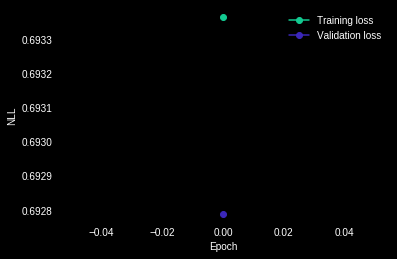

--------------------------------------------------------------------------------
Epoch: 1
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.692 | Train Acc: 53.16%
	 Test Loss: 0.692 |  Test Acc: 53.32%
--------------------------------------------------------------------------------
Epoch: 2
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.691 | Train Acc: 54.90%
	 Test Loss: 0.690 |  Test Acc: 54.94%
--------------------------------------------------------------------------------
Epoch: 3
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.689 | Train Acc: 57.14%
	 Test Loss: 0.689 |  Test Acc: 56.12%
--------------------------------------------------------------------------------
Epoch: 4
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.687 | Train Acc: 58.34%
	 Test Loss: 0.686 |  Test Acc: 58.06%
--------------------------------------------------------------------------------
Epoch: 5
Training...
Iteration 457        
Evaluating..

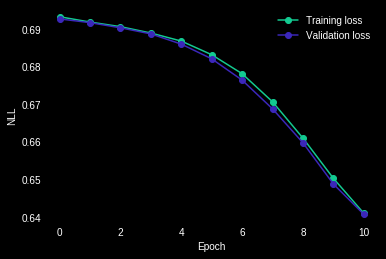

--------------------------------------------------------------------------------
Epoch: 11
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.632 | Train Acc: 64.92%
	 Test Loss: 0.633 |  Test Acc: 64.84%
--------------------------------------------------------------------------------
Epoch: 12
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.623 | Train Acc: 65.84%
	 Test Loss: 0.626 |  Test Acc: 65.21%
--------------------------------------------------------------------------------
Epoch: 13
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.616 | Train Acc: 66.42%
	 Test Loss: 0.622 |  Test Acc: 65.78%
--------------------------------------------------------------------------------
Epoch: 14
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.611 | Train Acc: 66.88%
	 Test Loss: 0.619 |  Test Acc: 66.48%
--------------------------------------------------------------------------------
Epoch: 15
Training...
Iteration 457        
Evaluat

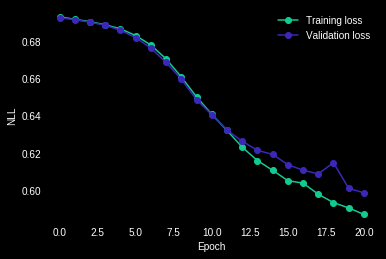

--------------------------------------------------------------------------------
Epoch: 21
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.583 | Train Acc: 69.67%
	 Test Loss: 0.608 |  Test Acc: 66.68%
--------------------------------------------------------------------------------
Epoch: 22
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.581 | Train Acc: 69.73%
	 Test Loss: 0.601 |  Test Acc: 68.81%
--------------------------------------------------------------------------------
Epoch: 23
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.578 | Train Acc: 70.11%
	 Test Loss: 0.595 |  Test Acc: 68.04%
--------------------------------------------------------------------------------
Epoch: 24
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.576 | Train Acc: 70.35%
	 Test Loss: 0.591 |  Test Acc: 69.39%
--------------------------------------------------------------------------------
Epoch: 25
Training...
Iteration 457        
Evaluat

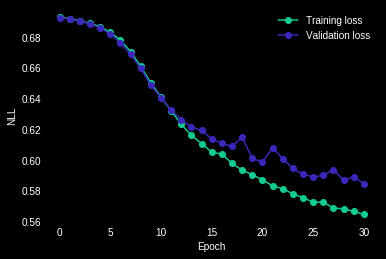

--------------------------------------------------------------------------------
Epoch: 31
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.565 | Train Acc: 71.15%
	 Test Loss: 0.583 |  Test Acc: 69.84%
--------------------------------------------------------------------------------
Epoch: 32
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.563 | Train Acc: 71.60%
	 Test Loss: 0.590 |  Test Acc: 69.90%
--------------------------------------------------------------------------------
Epoch: 33
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.562 | Train Acc: 71.48%
	 Test Loss: 0.605 |  Test Acc: 67.50%
--------------------------------------------------------------------------------
Epoch: 34
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.561 | Train Acc: 71.56%
	 Test Loss: 0.589 |  Test Acc: 69.84%
--------------------------------------------------------------------------------
Epoch: 35
Training...
Iteration 457        
Evaluat

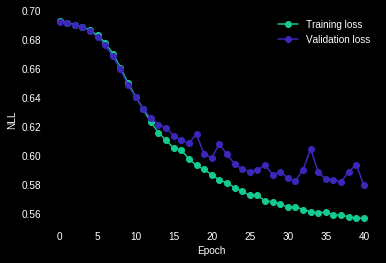

--------------------------------------------------------------------------------
Epoch: 41
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.557 | Train Acc: 71.84%
	 Test Loss: 0.590 |  Test Acc: 69.12%
--------------------------------------------------------------------------------
Epoch: 42
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.556 | Train Acc: 71.77%
	 Test Loss: 0.580 |  Test Acc: 70.47%
--------------------------------------------------------------------------------
Epoch: 43
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.556 | Train Acc: 71.85%
	 Test Loss: 0.581 |  Test Acc: 70.42%
--------------------------------------------------------------------------------
Epoch: 44
Training...
Iteration 457        
Evaluating...
	Train Loss: 0.555 | Train Acc: 71.82%
	 Test Loss: 0.580 |  Test Acc: 70.42%
--------------------------------------------------------------------------------
Epoch: 45
Training...
Iteration 457        
Evaluat

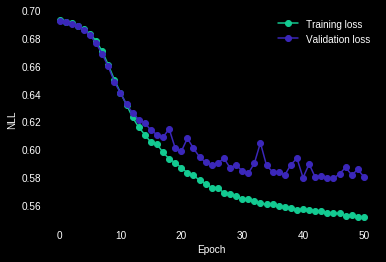

--------------------------------------------------------------------------------


In [81]:
import numpy as np
import matplotlib.pyplot as plt


#model_save_name = 'rnn_epoch%d_batch%d_drop%d.pt' %(N_EPOCHS,BATCH_SIZE,dropout)
#model_save_name="rnn_epoch20_batch32_drop01_bitrue.pt"
#path = F"/content/drive/My Drive/Model Outputs/{model_save_name}"
path = lstm_open

all_train_loss = []
all_test_loss = []
all_epochs = []
best_test_loss = float('inf')
all_predictions = list()
all_targets = list()
all_labels_idx = list()

for epoch in range(N_EPOCHS):
    print("Epoch: " + str(epoch))
    train_loss, train_acc = train(rnn, trainloader, optimizer, criterion)
    test_loss, test_acc, predictions, y, labels_idx= evaluate(rnn, testloader, criterion)
    #print (type(predictions))
    all_predictions.append(predictions)
    all_targets.append(y)
    all_labels_idx.append(labels_idx)
    #all_predictions = torch.cat((x, y), 0)


    #print (len(predictions), len(y))
    #train_loss  = train(rnn, trainloader, optimizer, criterion)
    #test_loss  = evaluate(rnn, testloader, criterion)    
    
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(rnn.state_dict(), path)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Test Loss: {test_loss:.3f} |  Test Acc: {test_acc*100:.2f}%')
    all_train_loss.append(train_loss)
    all_test_loss.append(test_loss)
    all_epochs.append(epoch)

    if epoch%10 == 0:
      plot_network(all_epochs, all_train_loss, all_test_loss)
    print (dash)
    #CM

## load lstm


In [0]:
#stored_lstm = True
stored_lstm = False

In [63]:
#loadpath = "/content/drive/My Drive/Model Outputs/%s" %(date)
date = '20200102'
savepath = "/content/drive/My Drive/Model Outputs/%s" %(date)
print (savepath)
lstm_save_name = '/epochs%d_batch%d_lstmnum%d_hdim%d_hout%d_dropout%s_lstm_model_ASGD.pt' %(N_EPOCHS,BATCH_SIZE,lstm_layers,hidden_dim,hidden_out,dropout)
print ('correct directory: epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD')
lstm_open = savepath + lstm_save_name
print (lstm_open)

loadpath = lstm_open
#os.chdir(loadpath)
date

/content/drive/My Drive/Model Outputs/20200102
correct directory: epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD
/content/drive/My Drive/Model Outputs/20200102/epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD.pt


'20200102'

In [65]:
if stored_lstm == True:
  path = loadpath
  print (path) 

  rnn = embedLSTM(input_dim=len(word_to_ix), 
              embedding_dim=EMDEDDING_DIM,
              hidden_dim = hidden_dim, 
              lstm_layers=lstm_layers, 
              hidden_out = hidden_out, 
              output_dim=output_dim, 
              padding_idx = word_to_ix["X"], 
              t=len(df_train.loc[:,"seq_idx"][0]),
              dropout=dropout).cuda()

  rnn.load_state_dict(torch.load(path, map_location=torch.device('cpu'),strict=False)) #try strict= False

  
  print ("pretrained lstm loaded")
  print (dash)



/content/drive/My Drive/Model Outputs/20200102/epochs51_batch70_lstmnum1_hdim40_hout150_dropout0_lstm_model_ASGD.pt


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


RuntimeError: ignored

# 7 - Filter and Confusion matrix - MAYBE RUNS
First, generate a sliding window of every test chunk of each genome in the dataset.

We annotate the procedence of each gene to see if we can cluster different cases by gene function.

In [0]:
#%cd "/content/drive/My Drive/Model Outputs/uploads_new"
savefasta = "/content/drive/My Drive/Model Outputs/Fastasplits_train_test"
os.chdir(savefasta)

In [92]:
all_tests = []
for i in range(len(test_feature_tables)):
  print(f"Processing {test_genomes[i]}")
  tmp = window_pipeline(test_genomes[i], 
                        test_feature_tables[i], 
                        by = test_splits[i],
                        window_size=window_size, 
                        num_windows=num_windows, 
                        annotate=False)  

  tmp = tmp[tmp["label"]!="partial"]
  tmp = tmp.sort_values(by="start")  # sequential data
  # to differentiate one genome from another
  # I guess it could be better managed with levels at pd.concat
  tmp["genome"] = test_genomes[i]
  all_tests.append(tmp)

all_tests = pd.concat(all_tests)

Processing 0_0_TEST_GCF_000008525.1_ASM852v1_genomic.fna
Processing 1_0_TEST_GCF_000008665.1_ASM866v1_genomic.fna
Processing 2_0_TEST_GCF_000008865.2_ASM886v2_genomic.fna
Processing 3_0_TEST_GCF_000009045.1_ASM904v1_genomic.fna
Processing 4_0_TEST_GCF_000027305.1_ASM2730v1_genomic.fna
Processing 5_0_TEST_GCF_000027325.1_ASM2732v1_genomic.fna
Processing 6_0_TEST_GCF_000027345.1_ASM2734v1_genomic.fna
Processing 7_0_TEST_GCF_000091665.1_ASM9166v1_genomic.fna
Processing 8_0_TEST_GCF_000214725.1_ASM21472v1_genomic.fna
Processing 9_0_TEST_GCF_003015225.1_ASM301522v1_genomic.fna


In [95]:
len(all_tests)

100000

In [0]:
all_tests = all_tests.iloc[:100000,:] # necesssary to reduce dimensionality

In [96]:
from torch.utils.data import DataLoader, Dataset

class oversampdata(Dataset):
  def __init__(self, data):
    # first column is list of index sentence
    self.data = torch.LongTensor(np.ndarray.astype(np.array([
                    np.array(r) 
                    for r in data.iloc[:,0].to_numpy()]), "int64"))
    # second column is the labels
    self.targets = torch.LongTensor(np.ndarray.astype(np.array([
                    np.array(r) 
                    for r in data.iloc[:,1].to_numpy()]), "int64"))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    data_val = self.data[index]
    target = self.targets[index]
    return data_val, target


all_tests["onehot"] = all_tests.sequence.apply(lambda x: code_one_hot(x, nuc_to_ix))
all_tests["onehot_label"] = all_tests.label.apply(lambda x: lab2vec[x][0:2])

all_tests["seq_idx"] = all_tests["sequence"].apply(wind_idx) #<-------------------------

print (all_tests)

#testing_dataset = oversampdata(all_tests.loc[:,["onehot", "onehot_label"]].iloc[:300000,:])
testing_dataset = oversampdata(all_tests.loc[:,["seq_idx", "onehot_label"]].iloc[:100000,:])
#testingloader = torch.utils.data.DataLoader(testing_dataset, batch_size=1, 
#                                         shuffle=False, drop_last = False)
testingloader = torch.utils.data.DataLoader(testing_dataset, batch_size=1, 
                                         shuffle=False, drop_last = False)

"""
df_test["seq_idx"] = df_test["sequence"].apply(wind_idx)
valid_dataset = oversampdata(df_test.loc[:,["seq_idx", "label_onehot"]])
testloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, 
                                         shuffle=False)
                                         """

                                                sequence  ...                                            seq_idx
0      GCCTATTTTGGCATGCCCTAATGACCCTGATGATGTCGCTACTTTG...  ...  [49, 17, 62, 53, 12, 16, 29, 45, 16, 45, 45, 5...
1      CCTATTTTGGCATGCCCTAATGACCCTGATGATGTCGCTACTTTGA...  ...  [19, 3, 21, 9, 27, 19, 28, 54, 19, 23, 23, 2, ...
2      CTATTTTGGCATGCCCTAATGACCCTGATGATGTCGCTACTTTGAG...  ...  [37, 62, 18, 58, 49, 37, 12, 44, 13, 12, 12, 3...
3      TATTTTGGCATGCCCTAATGACCCTGATGATGTCGCTACTTTGAGC...  ...  [17, 62, 53, 12, 16, 29, 45, 16, 45, 45, 51, 1...
4      ATTTTGGCATGCCCTAATGACCCTGATGATGTCGCTACTTTGAGCG...  ...  [3, 21, 9, 27, 19, 28, 54, 19, 23, 23, 2, 39, ...
...                                                  ...  ...                                                ...
24880  AAACACCACTAGCAATGTGCGTTCTGCCAACAACGCCCTTGCGCAA...  ...  [33, 25, 25, 31, 1, 51, 47, 11, 27, 1, 1, 14, ...
24881  AACACCACTAGCAATGTGCGTTCTGCCAACAACGCCCTTGCGCAAA...  ...  [8, 44, 15, 0, 28, 6, 34, 26, 49,

'\ndf_test["seq_idx"] = df_test["sequence"].apply(wind_idx)\nvalid_dataset = oversampdata(df_test.loc[:,["seq_idx", "label_onehot"]])\ntestloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, \n                                         shuffle=False)\n                                         '

In [0]:
#all_tests["seq_idx"] = all_tests["sequence"].apply(wind_idx)

In [0]:
df_test
#df_test.loc[:,["seq_idx", "label_onehot"]]

In [0]:
all_tests

In [0]:
# convlstm model recalled froom other notebook
"""
t = len(all_tests.iloc[0,0]) # Find length of seqs (fixed)

rnn = convLSTM(input_dim=4, out_channels=4, stride=5,
               hidden_dim=60, hidden_out=140, output_dim=2, t = t).cuda()
path = "/content/drive/My Drive/convlstm_big.pt" 
optimizer = torch.optim.ASGD(rnn.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss().cuda()
rnn.load_state_dict(torch.load(path, map_location=torch.device('cuda')))
"""

<All keys matched successfully>

### Evaluation and Lowpass

In [0]:
from torch.nn import Parameter
import matplotlib.pyplot as plt
import sys
# Colab in dark mode, guys :)
plt.style.use(['seaborn-dark', 'dark_background'])

def evaluate_test(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    print("Evaluating...")
    predictions_all = []

    for i, batch in enumerate(iterator):
        if not i%10:
            sys.stdout.write(f"\rIteration {i}        ")
            sys.stdout.flush()
        inputs, labels_onehot = batch
        inputs = Variable(inputs).cuda()
        #if prediction.size()
        #print (inputs.size()) 
        predictions = model(inputs)
        labels_idx = torch.LongTensor([np.where(label==1)[0][0] for label in labels_onehot]).cuda()

        #print (predictions.size(), labels_onehot.size())
        loss = criterion(predictions, labels_idx)
        acc = binary_accuracy(predictions, labels_onehot)

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        predictions_all.append(predictions)
    return epoch_loss / len(iterator), epoch_acc / len(iterator), predictions_all

def bin_acc(preds, y):
  correct = 0
  for idx, pred in enumerate(preds):
    if pred == y[idx]:
      correct += 1
  return correct/len(preds)

# execute!
valid_loss, valid_acc, preds = evaluate_test(rnn, testingloader, criterion)

In [98]:
test_annotation = [1 if lab=="gene" else 0 for lab in all_tests.loc[:,"label"]]
preds = preds[:len(test_annotation)]
rounded_preds = torch.zeros(len(preds))
for i in range(len(preds)):
  if preds[i][0][0] > preds[i][0][1]:
    rounded_preds[i] = 0
  else:
    rounded_preds[i] = 1

acc = bin_acc(rounded_preds,test_annotation)
print("Test acc: " + str(acc))

Evaluating...
Iteration 99990        

NameError: ignored

In [0]:
#https://discuss.pytorch.org/t/expected-tensor-for-argument-1-indices-to-have-scalar-type-long-but-got-cpufloattensor-instead-while-checking-arguments-for-embedding/32441/5

In [100]:
test_annotation = [1 if lab=="gene" else 0 for lab in all_tests.loc[:,"label"]]
rounded_preds = torch.zeros(len(preds))
for i in range(len(preds)):
  if preds[i][0][0] > preds[i][0][1]:
    rounded_preds[i] = 0
  else:
    rounded_preds[i] = 1

print("Validation acc: " + str(valid_acc))

acc = bin_acc(rounded_preds,test_annotation)

print("Val acc: " + str(acc))

Validation acc: 0.42497
Val acc: 0.57503


In [0]:
import numpy as np
from scipy.signal import butter, lfilter, freqz

def lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Define lowpass filter
def lowpass_filter(data, cutoff, fs, order):
    b, a = lowpass(cutoff, fs, order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 1
fs = 100.0       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz

In [102]:
output_vector = test_annotation
filtered_output = lowpass_filter(rounded_preds, cutoff, fs, order)
filtered = [i >= 0.5 for i in filtered_output]
filt_acc = bin_acc(filtered, output_vector)
filt_acc

0.67499

### Confusion matrix for filtered output

In [0]:
from sklearn.metrics import confusion_matrix

output_vector = output_vector[:len(preds)]
tn, fp, fn, tp = confusion_matrix(filtered, output_vector).ravel()

In [104]:
all_tests.onehot_label.apply(lambda x: x[0] == 1).count()

100000

In [0]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*(precision*recall)/(precision+recall)

In [106]:
print(f"precision -> {precision}\nrecall -> {recall}\nf1 score -> {f1}")

precision -> 0.8572056180523198
recall -> 0.7472842486421243
f1 score -> 0.7984796532716596
